# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [8]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [9]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(1.2641)


## Sampling from categorical probabilities with given probabilities

In [10]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

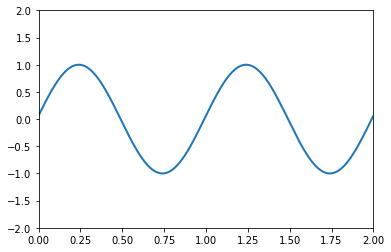

In [11]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

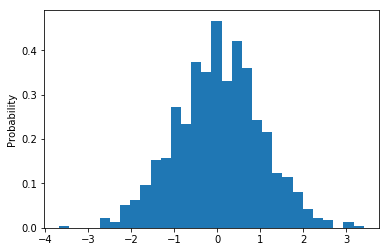

In [12]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

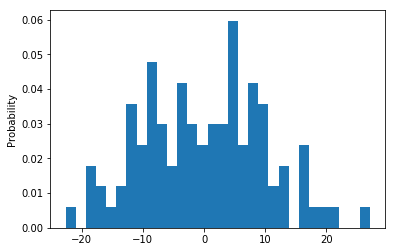

In [61]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()
arr = []
def animate():
    def update_hist(i):
        plt.cla()
        x = pyro.sample("normal_sampling", pyro.distributions.Normal(0, 10))
        arr.append(x)
        plt.hist(arr, density=True, bins=30)
        plt.ylabel('Probability');
    anim = animation.FuncAnimation(fig, update_hist, frames = 100, interval = 50)
    return HTML(anim.to_jshtml())
animate()

## Task 2

In [65]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
sickPer50k = 1
popNumber = 50000
diseaseChance = sickPer50k / 50000
arr = np.array([])
results = []
for i in range(1, 100):
    sickPer50k = i
    for j in range(0, popNumber):  
        x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([diseaseChance, 1 - diseaseChance])))
        if x == 0:
            x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([0.01, 0.99])))
        else:
            x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([0.00, 0.00, 0.02, 0.98])))
        arr = np.append(arr, x)
    #wylicz praiwdłowe wykrycia choroby wśród pacjentów dla których test wypadł pozytywnie
    result = np.count_nonzero(arr == 1)/(np.count_nonzero(arr == 2) + np.count_nonzero(arr == 1))
    results.append(result)
    #czyszczenie tablicy pacjentów
    arr = np.array([0])
print(results)

[0.0, 0.000975609756097561, 0.0009861932938856016, 0.0020429009193054137, 0.002070393374741201, 0.0, 0.0, 0.0, 0.003215434083601286, 0.001976284584980237, 0.0, 0.0019588638589618022, 0.002012072434607646, 0.0009852216748768472, 0.0010204081632653062, 0.0019646365422396855, 0.002, 0.0, 0.000998003992015968, 0.0, 0.0, 0.0, 0.0, 0.0009199632014719411, 0.0, 0.001949317738791423, 0.0, 0.0, 0.0010214504596527069, 0.0009689922480620155, 0.0019047619047619048, 0.0, 0.001002004008016032, 0.0, 0.001893939393939394, 0.0009823182711198428, 0.002008032128514056, 0.0010152284263959391, 0.0, 0.003157894736842105, 0.0, 0.001968503937007874, 0.0, 0.002036659877800407, 0.000999000999000999, 0.0040609137055837565, 0.0, 0.003956478733926805, 0.0009970089730807576, 0.001996007984031936, 0.0, 0.0, 0.0019880715705765406, 0.0, 0.0010070493454179255, 0.002938295788442703, 0.0, 0.0009861932938856016, 0.000992063492063492, 0.0, 0.0010193679918450561, 0.00196078431372549, 0.0010152284263959391, 0.0020618556701030

In [ ]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

